# Example notebook using the Joint Return Probability (JRP) module

In [1]:
from app.jrp import JRP
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# file output from Eleonora's detectExtremeEvents software
file = "/DATA/jextr_api9824h98pot5_daily_7dw.xlsx"
        
# loads the data from the file to create a new JRP object
# I'm increasing num_samples here to improve the presentation in the figures
jrp =  JRP.from_detectExtremeEvents(file,num_samples=5000)      
    
# reformats the data for Stan, prints a summary
jrp.format_data_for_stan(
    # these are the user defined values for a JRP2 plot with fixed marginal return periods (see below)
    # note we only specify two here, but you can add as many as you like (4 would reproduce the red limnes
    # in the old JRP plot)
    u_rp_d1_years=np.array([2,10,10,2]),
    u_rp_d2_years=np.array([2,10,2,10]),
    # these are the user defined values for a JRP2 plot with fixed driver values (see below)
    u_val_d1 = np.array([350]),
    u_val_d2 = np.array([80]),
    # these allow the user to set the minimum and maximum values used for the JRP grid
    # allowing the user to plot outside of the range of the data
    # if they are commeneted out, the range of the JRP grid will default to the user data
    #grid_d1_min = zzz
    grid_d1_max = 485.4056656+10,
    #grid_d2_min = xxxx
    #grid_d2_max = xxxx
    
    )


-------------------------------------------------------------------------
DATA SUMMARY
-------------------------------------------------------------------------
Driver 1: API , threshold 98.0 % , 270.4298 mm
Driver 2: r24h , threshold 98.0 % , 42.4332 mm
34 extreme events selected using:
 (1) A search window of 7 days 
 (2) minimum peaks distance of 5 unit coherent with temporal resolution for driver 1
 (3) minimum peaks distance of 5 unit coherent with temporal resolution for driver 2.
Giving a correlation coefficient of  0.17291
-------------------------------------------------------------------------
STAN CONFIGURATION
-------------------------------------------------------------------------
Stan will be run with 4 chains for 5000 samples each.
All other settings set to defaults
-------------------------------------------------------------------------
JRP CONTOUR PLOT CONFIGURATION
-------------------------------------------------------------------------
JRP grid for the contour plo

()

In [3]:
# compiles the Stan model (generates lots of warnings, ignore them)
jrp.build_stan_model()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_k6i7qw4y/model_d5ebazw3.stan', line 150, column 14: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_k6i7qw4y/model_d5ebazw3.stan', line 151, column 14: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_k6i7qw4y/model_d5ebazw3.stan', line 319, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

Building Stan model ...


In [4]:
# sample from the posterior
jrp.run_stan_model()

Sampling:   0%


Running Stan model ...


Sampling:   0% (1/24000)
Sampling:   0% (2/24000)
Sampling:   0% (102/24000)
Sampling:   1% (202/24000)
Sampling:   2% (401/24000)
Sampling:   2% (600/24000)
Sampling:   4% (900/24000)
Sampling:   5% (1100/24000)
Sampling:   5% (1300/24000)
Sampling:   6% (1500/24000)
Sampling:   7% (1700/24000)
Sampling:   8% (1800/24000)
Sampling:   8% (1900/24000)
Sampling:   9% (2100/24000)
Sampling:  10% (2300/24000)
Sampling:  10% (2500/24000)
Sampling:  12% (2800/24000)
Sampling:  12% (3000/24000)
Sampling:  13% (3200/24000)
Sampling:  36% (8600/24000)
Sampling:  58% (13800/24000)
Sampling:  79% (19000/24000)
Sampling: 100% (24000/24000)
Sampling: 100% (24000/24000), done.
Messages received during sampling:
  Gradient evaluation took 0.001021 seconds
  1000 transitions using 10 leapfrog steps per transition would take 10.21 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception:

  Gradient evaluation took 0.000359 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.59 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: Exception: Exception: sigma<=0; found sigma =0 (in '/tmp/httpstan_wkpozuqq/model_d5ebazw3.stan', line 19, column 10 to column 51) (in '/tmp/httpstan_wkpozuqq/model_d5ebazw3.stan', line 258, column 8 to column 49) (in '/tmp/httpstan_wkpozuqq/model_d5ebazw3.stan', line 349, column 8 to line 352, column 34)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Exception: Exception: Exception: Exception: k<0 and max(y-ymin)/sigma > -1/k; found k, sigma =-0.577229127.622 (in '/tmp/httpstan_wkpozuqq/model_d5ebazw3.s

In [5]:
# print summary
# !!!!!!  IMPORTANT !!!!!!!!!!
# rhat should all be <1.1, preferably 1.0
# ess_bulk and ess_tall should all be on the order of thousands
#
# NaN in mcse_mean, mcse_sd, ess_bulk, ess_tail and r_hat
jrp.get_summary()

/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1734: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1734: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
arviz - WARNING - Array contains NaN-value.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma1,65.482,17.460,34.559,98.253,0.155,0.110,12454.0,11595.0,1.0
xi1,0.053,0.258,-0.378,0.563,0.002,0.002,11555.0,11418.0,1.0
sigma2,64.148,14.609,38.451,91.459,0.129,0.092,12974.0,13203.0,1.0
xi2,-0.484,0.214,-0.870,-0.060,0.002,0.001,12077.0,13316.0,1.0
theta,1.305,0.195,1.000,1.645,0.002,0.001,10008.0,6839.0,1.0
...,...,...,...,...,...,...,...,...,...
u_d2_for_rp[3],129.032,11.341,109.778,148.107,NaN,NaN,NaN,NaN,NaN
u_JRP[0],1154.546,88.653,1000.353,1323.528,NaN,NaN,NaN,NaN,NaN
u_JRP[1],12122.822,5145.964,5853.884,22428.129,NaN,NaN,NaN,NaN,NaN
u_JRP[2],4806.173,664.096,3815.915,6116.285,NaN,NaN,NaN,NaN,NaN


In [6]:
# return periods and joint return periods for the events selected with detectExtremeEvents
jrp.generate_table()

data                     Joint Return Period (JRP, years)             \
         Time      API mm r24h mm                             mean     median   
0  1981-09-26  351.897978  106.43                        10.415711   9.376075   
1  1981-11-03  272.218593   42.81                         1.119031   1.117769   
2  1982-10-27  303.791680  114.29                         8.111247   7.454243   
3  1983-10-04  273.183131   91.91                         3.078927   2.981880   
4  1984-09-21  284.665805   92.16                         3.472472   3.357212   
5  1986-12-13  288.673519   59.26                         1.852010   1.831311   
6  1987-09-22  304.542927   78.72                         3.228002   3.137456   
7  1987-10-22  273.943031   67.71                         1.782695   1.759399   
8  1988-01-14  307.601568   65.50                         2.662876   2.602438   
9  1990-02-01  274.843814   49.70                         1.300398   1.295915   
10 1991-03-16  341.834447  135.70                        32.284596  24.413500   
11 1991-11-03  285.707021   68.74                         2.103588   2.073510   
12 1991-11-12  295.457378   52.09                         1.830674   1.806855   
13 1992-09-07  322.741521  117.78                        10.974357   9.822042   
14 1994-01-02  344.024449   97.35                         7.657739   7.079998   
15 1994-01-13  485.405666  107.43                       108.801638  47.778816   
16 1994-02-06  340.340990   63.25                         4.096685   3.931326   
17 1995-10-05  321.175130   88.97                         4.864903   4.639602   
18 1995-10-25  359.347312   94.22                         8.671015   7.935617   
19 1997-10-09  339.812744  105.91                         8.976928   8.194236   
20 1998-01-12  414.796877   75.37                        14.689383  12.644505   
21 2000-12-08  283.763300   48.40                         1.456290   1.445918   
22 2002-02-02  303.099685   80.38                         3.276357   3.185263   
23 2002-11-12  325.809398  144.41                       138.145686  41.469401   
24 2002-11-21  336.659505   57.61                         3.617592   3.494032   
25 2002-11-28  464.091353   78.55                        39.783508  26.488863   
26 2009-01-25  284.053925   48.34                         1.461454   1.450697   
27 2013-01-29  362.011487  100.62                        10.229383   9.205985   
28 2014-02-06  370.434799   64.72                         6.495288   6.067085   
29 2014-02-13  358.528315   47.71                         4.537961   4.327887   
30 2014-02-22  332.456813   48.51                         3.064253   2.969259   
31 2014-11-15  334.652767   73.54                         4.375957   4.187647   
32 2015-12-30  274.304535  107.59                         4.950136   4.685694   
33 2017-05-15  276.187230  102.00                         4.208853   4.021616   

                                       \
           std       pc10        pc90   
0     4.700847   5.812225   16.250596   
1     0.009308   1.108441    1.131139   
2     3.167764   4.920480   12.049487   
3     0.629197   2.386739    3.890006   
4     0.764964   2.625496    4.450051   
5     0.188595   1.631748    2.098314   
6     0.657170   2.484882    4.081108   
7     0.180239   1.577894    2.018446   
8     0.450123   2.144880    3.247346   
9     0.046397   1.245804    1.360733   
10   27.804660  11.419203   60.704514   
11    0.263671   1.799359    2.445106   
12    0.192105   1.608097    2.083477   
13    5.089091   6.031079   17.214975   
14    2.897336   4.677656   11.300407   
15  338.037351  17.234170  206.887175   
16    1.019438   2.969831    5.418611   
17    1.374518   3.369521    6.632576   
18    3.522787   5.113046   13.110498   
19    3.725433   5.244476   13.601099   
20    8.283868   7.183077   24.468388   
21    0.088846   1.353219    1.572272   
22    0.676241   2.514689    4.152852   
23  745.901979  14.484978  207.739475   
24    0.822840   2.699535 

Generating trace plot ...


()

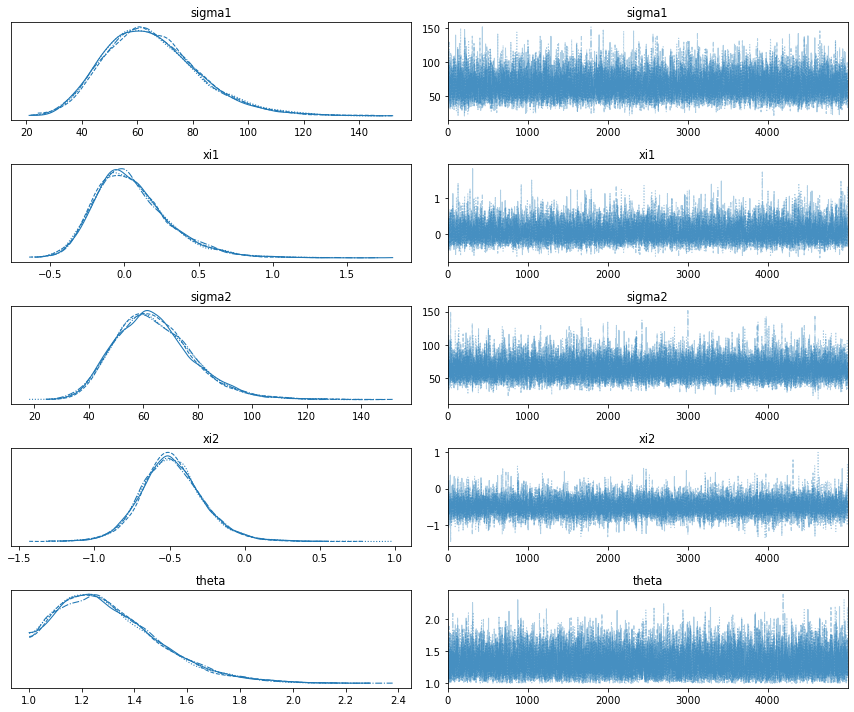

In [7]:
# inspect the trace plot for pathologies
# (1) high autocorrelation (will also manifest as ess_bulk and ess_tall values in the hundreds )
# (2) divergences - marked as vertical black lines along the x axis in the trace plot, often
#     associated with the chain getting stuck somewhere
#
# Here we just show the model parameters (sigma1, sigma2, xi1, xi2, theta) and not values derived from them
jrp.generate_trace_plot("/DATA/trace_plot.png",)

Generating JRP plot ...
NOTE: np.nanperctile used to calculate jrp_50


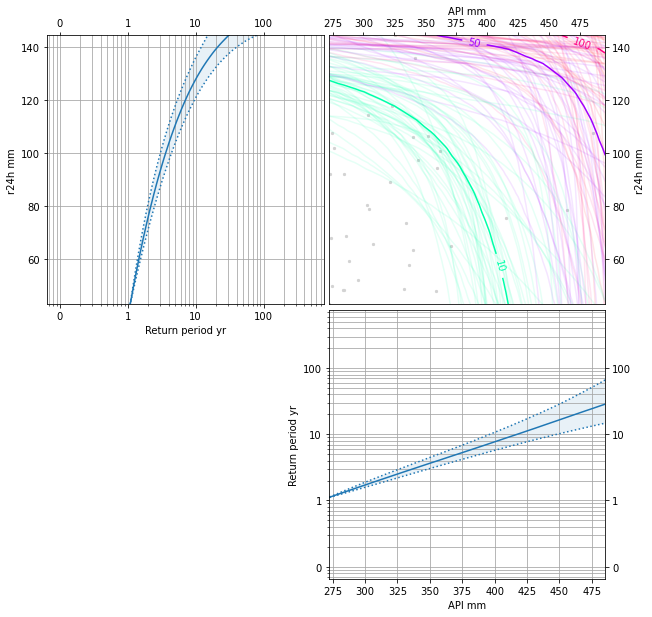

In [8]:
# JRP plot without lines
fig = jrp.generate_jrp_plot(filename="/DATA/jrp_without_lines_plot.png")

Generating JRP plot ...
NOTE: np.nanperctile used to calculate jrp_50


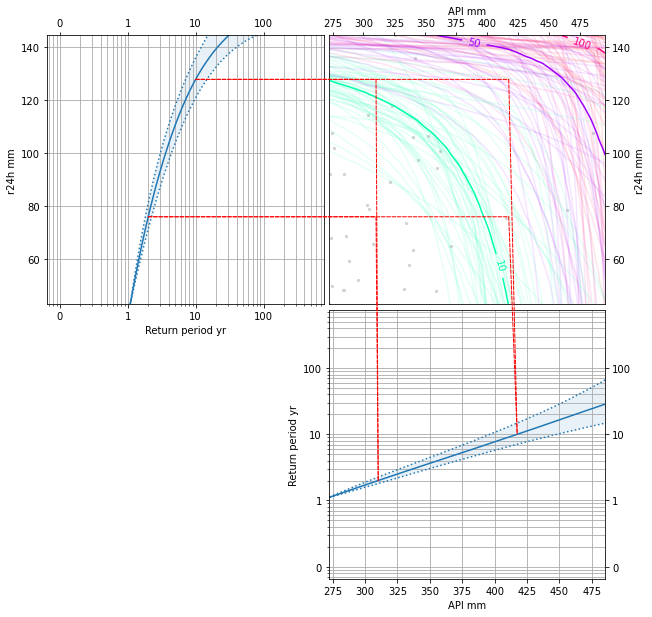

In [9]:
# JRP plot with lines


# driver 1 marginal return period for the red lines -  these are fixed values we set when
# when we initialised the JRP object
# note we have to convert back to years by dividing though by 365
d1_rps = jrp.stan_data['u_rp_d1']/365


# driver 2 marginal return period for red lines above - fixed value again
d2_rps = jrp.stan_data['u_rp_d2']/365

# driver 1 values for red lines above - 50th percentile is used here
# but if you want a line matching up with the 20th or 80th percentile lines
# on the marginal plots just replace 50 with 20 or 80
d1_val50 = np.nanpercentile(jrp.result['u_d1_for_rp'],50,axis=1)

# driver 2 values for red lines above  - 50th percentile
d2_val50 = np.nanpercentile(jrp.result['u_d2_for_rp'],50,axis=1)

# JRPs for both points - 50th percentile (if we want them)
np.nanpercentile(jrp.result['u_JRP']/365,50,axis=1)


driver1_coords = np.array([d1_val50,d1_rps]).T

driver2_coords = np.array([d2_rps,d2_val50]).T

jrp_coords = np.array([d1_val50,d2_val50]).T


fig = jrp.generate_jrp_plot(
                            driver1_coords=driver1_coords,
                            driver2_coords=driver2_coords,
                            jrp_coords=jrp_coords,
                            filename="/DATA/jrp_with_lines_plot.png"
                        )

In [10]:
## BUT! I think we should also include the following figures, at least in the final report
# when we are describing the Bayesian model, to avoid any confusion

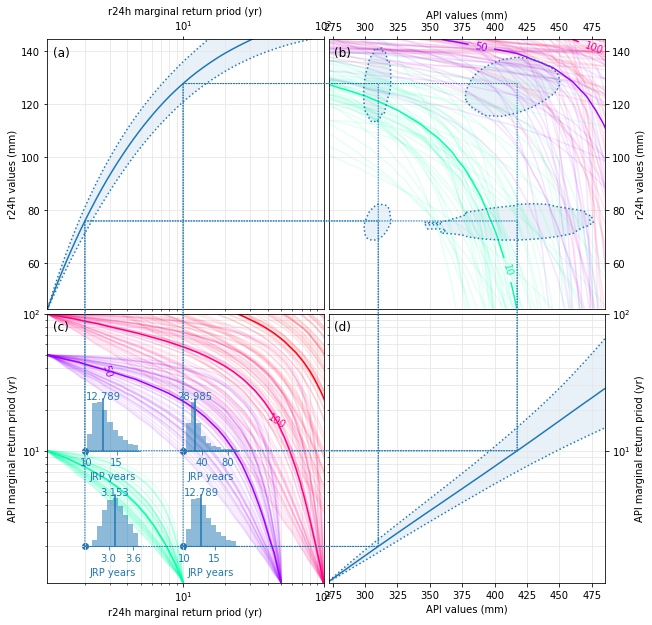

In [11]:
# It's important to note that fixing the marginal return probability for the two drivers
# defines a distribution over the driver values, and vice versa, i.e. fixing a value
# for both of the drivers specifies a distribution over marginal return periods.
#
# In other words, there isn't a 1:1 relationship between driver value and driver marginal return period
#
# In order to make this clear in our final report I created a modified JRP plot with the fourth panel added
# to give a 2nd JRP contour plot, but this time specified in terms of marginal return probability instead of
# the driver values. This now forms panel (c), shown below.
#
# Here we fix driver marginal return periods (mrp) for two events, one at (20,20) years, one at (200,200) years. 
# These plot as single points in panel (c). But each of these points specifies a distribution over 
# Joint Return Probability (JRP), shown by the histograms plotted inset in (c), and a distribution  over 
# driver values, represented by  the ellipses (that enclose 50% of the probability mass of these distributions) 
# in panel (b). Here, the dotted lines linking panels connect the medians of the distributions.
#
# This is a necessary consequence of our Bayesian model. Our model infers a posterior distribution over its
# parameters (i.e. sigma1, sigma2, xi1, xi2, theta), which means for any driver value or mrp held constant, there is 
# a distribution over the model parameters, and therefore a distribution over anything inferred from them. 
#
# In this case we have fixed values of marginal return probability and we want to estimate the JRP and the 
# driver values from them. However our model specifies distributions over the parameters sigm1, etc., so we
# therefore have distributions over driver values and JRP also.

jrp.generate_jrp_plot2(
    PLOT_USER_D1D2=True,
    PLOT_ALL_DATA=False,
    filename="/DATA/jrp2_with_fixed_mrp.png"
)

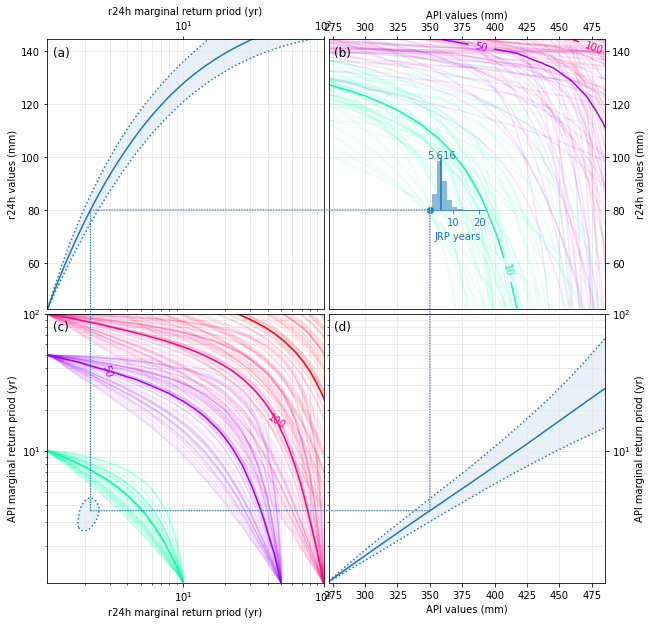

In [12]:
# we can see the same situation in reverse by fixing the driver values, instead of the mrps. 
# Here the values of the driver are fixed, and the events plot as single points in panel (b),
# defining a distribution over JRP values which are shown as inset graphs as before. You can think
# of the inset  graphs as showing the distribution of all the JRP contours that insersect that point.
# The median value of the JRP is highlighted on each inset plot. However, to calculate the marginal return period
# for these fixed driver values we need to use the model parameters (sigma1, theta, etc.), and we have
# distributions over these parameters, so again we have distributions over the marginal return periods,
# as shown in panel (c). Note that although the blue dotted lines join the medians of the distributions
# as before, the (mrp,mrp) plot is on log-log axes, and so the medians appear more offset with respect to the 
# center of the ellipse than they are.
# 
jrp.generate_jrp_plot2(
    PLOT_USER_D1D2=False,
    PLOT_ALL_DATA=False,
    PLOT_USER_MRPS=True,
    filename="/DATA/jrp2_with_fixed_vals.png"

)

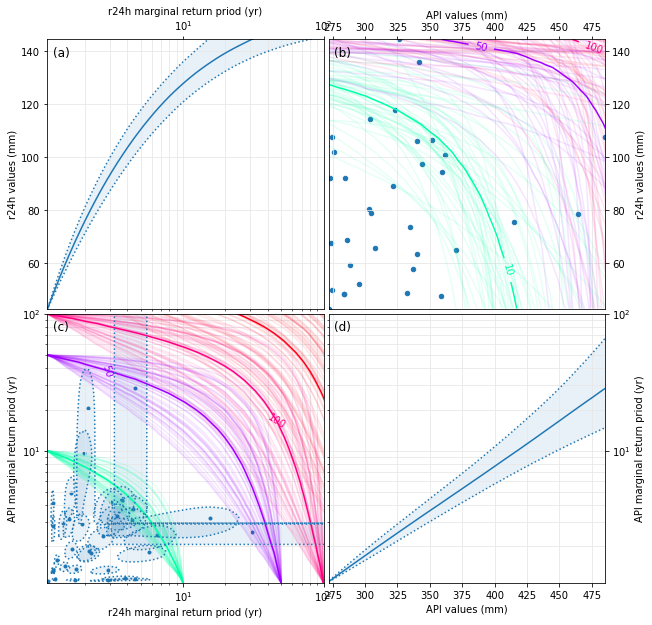

In [13]:
# We can do a similar plot, but this time with the distributions over marginal return period
# for all of our data, as inferred by our model (we omit the lines joining them and the JRP
# inset plots to avoid cluttering up the figure)

jrp.generate_jrp_plot2(PLOT_ALL_DATA=True)

/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/matplotlib/mlab.py:977: RuntimeWarning: invalid value encountered in subtract
  diff = self.dataset - points[:, i, np.newaxis]
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


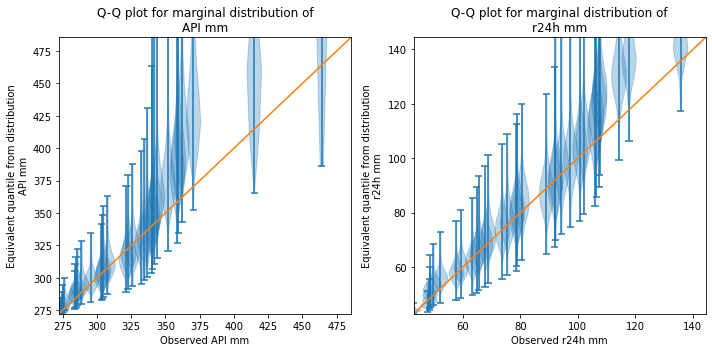

In [6]:
# Bayesian quantile-quantile plot
jrp.generate_QQ_plot("/DATA/qq_plot.png")

/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20000,) + inhomogeneous part.

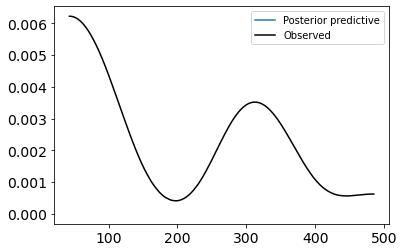

In [7]:
# Posterior predictive checks plot
jrp.generate_ppc_plot("/DATA/ppc_plot.png")

Generating corner plot ...


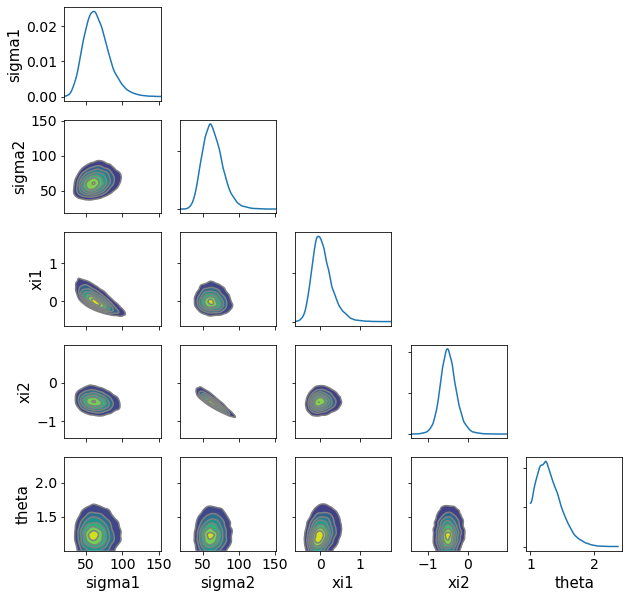

In [9]:
# Corner plot
fig = jrp.generate_corner_plot("/DATA/corner_plot.png")